In [456]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
import imutils
import os

work_dir = '/media/alex/SP UFD U3/out2/'
img1 = 'ch03_20200116085933.mp4_006.jpg'
img2 = 'ch03_20200116085933.mp4_007.jpg'

## research part

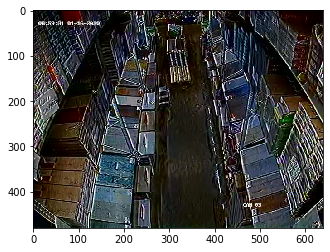

In [371]:
imshow(Image.open(work_dir+img1))

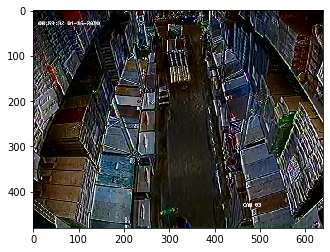

In [372]:
imshow(Image.open(work_dir+img2))

In [373]:
background = cv2.imread(work_dir+img1)
with_people = cv2.imread(work_dir+img2)

In [ ]:
## grayscale

In [374]:
back_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
peop_gray =cv2.cvtColor(with_people, cv2.COLOR_BGR2GRAY)

back_gray = imutils.resize(back_gray, width=500)

peop_gray = imutils.resize(peop_gray, width=500)

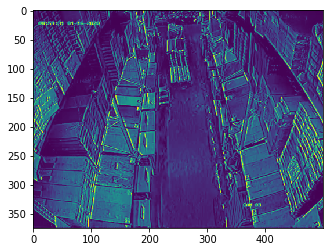

In [375]:
imshow(back_gray)

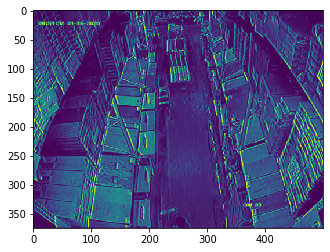

In [377]:
imshow(peop_gray)

In [378]:
back_gray =  cv2.GaussianBlur(back_gray, (21, 21),0)
peop_gray = cv2.GaussianBlur(peop_gray, (21, 21), 0)

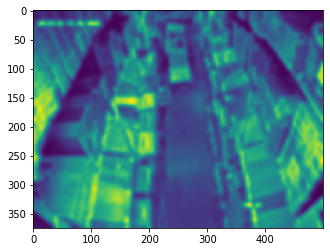

In [379]:
imshow(back_gray)

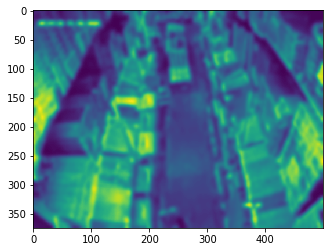

In [380]:
imshow(peop_gray)

In [381]:
frameDelta = cv2.absdiff(back_gray, peop_gray)

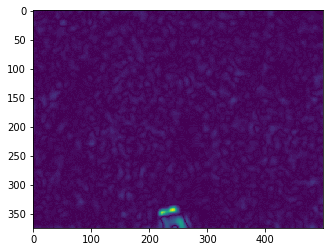

In [382]:
imshow(frameDelta)

In [517]:
thresh = cv2.threshold(frameDelta, 25, 250, cv2.THRESH_BINARY)[1]

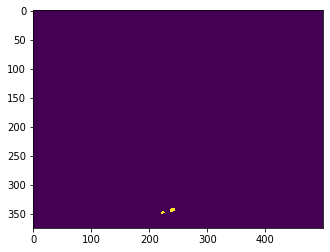

In [410]:
imshow(thresh)

In [518]:
thresh = cv2.dilate(thresh, None, iterations=20)

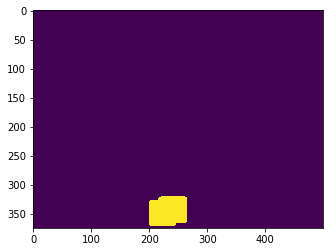

In [519]:
imshow(thresh)

In [413]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [414]:
print(len(cnts))

1


## In one def

In [510]:
def how_many_contours(first, second):
    first = cv2.imread(first)
    second = cv2.imread(second)
    back_gray = cv2.cvtColor(first, cv2.COLOR_BGR2GRAY)
    peop_gray =cv2.cvtColor(second, cv2.COLOR_BGR2GRAY)
    back_gray = imutils.resize(back_gray, width=500)
    peop_gray = imutils.resize(peop_gray, width=500)
    back_gray =  cv2.GaussianBlur(back_gray, (21, 21), 0)
    peop_gray = cv2.GaussianBlur(peop_gray, (21, 21), 0)
    frameDelta = cv2.absdiff(back_gray, peop_gray)
    thresh = cv2.threshold(frameDelta, 25, 250, cv2.THRESH_BINARY)[1]
    thresh = cv2.dilate(thresh, None, iterations=20)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    return (len(cnts))

In [511]:
how_many_contours(work_dir+img1, work_dir+img2)

1

In [356]:
# list with all jpeg
frame_list = []
for element in os.listdir(work_dir):
    if element.endswith('.jpg'):
        frame_list += [str(element)]

In [357]:
len(frame_list)

1874

In [512]:
#compare two neighbour frames
contour_list = []
for i in range(len(frame_list)-1):
    contour_list += [(how_many_contours(work_dir+frame_list[i],work_dir+frame_list[i+1]))]
    #print (frame_list[i], frame_list[i+1])

In [486]:
len(contour_list)

1873

In [487]:
def how_many_peoples(people_list):
    zero_list = []
    i = 0
    for element in people_list:
        if element == 0:
            zero_list +=[i]
        i+=1
        
    zero_list.append(len(people_list)-1)
    number = 0
    
    for i in range(len(zero_list)-1):
         number +=(max(people_list[zero_list[i]: zero_list[i+1]]))
    return (number)

In [513]:
how_many_peoples(contour_list)

230

## Test

In [520]:
def how_looks_contours(first, second):
    first = cv2.imread(first)
    second = cv2.imread(second)
    back_gray = cv2.cvtColor(first, cv2.COLOR_BGR2GRAY)
    peop_gray =cv2.cvtColor(second, cv2.COLOR_BGR2GRAY)
    back_gray = imutils.resize(back_gray, width=500)
    peop_gray = imutils.resize(peop_gray, width=500)
    back_gray =  cv2.GaussianBlur(back_gray, (21, 21), 0)
    peop_gray = cv2.GaussianBlur(peop_gray, (21, 21), 0)
    frameDelta = cv2.absdiff(back_gray, peop_gray)
    thresh = cv2.threshold(frameDelta, 25, 250, cv2.THRESH_BINARY)[1]
    thresh = cv2.dilate(thresh, None, iterations=20)
    
    
    fig, axes = plt.subplots(1, 3)
    image_1 = thresh
    image_2 = thresh
    

    axes[0].imshow(first)

    axes[1].imshow(second)

    axes[2].imshow(thresh)

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

    fig.set_figwidth(12)
    fig.set_figheight(6)    

    plt.show()    

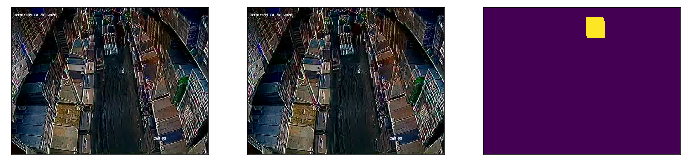

In [538]:
how_looks_contours(work_dir+frame_list[132],work_dir+frame_list[132])

доработка алгоритма:
0 поправка в меньшую сторону
1 исключить время уборки
2 человек стоит == 0,
3 до пересечения контуром границы 
4 размытие контура больше
